In [2]:
!source ./bin/activate

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


ModuleNotFoundError: No module named 'pandas'

In [21]:
df = pd.read_csv("all_month.csv")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9593 entries, 0 to 9592
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9593 non-null   object 
 1   latitude         9593 non-null   float64
 2   longitude        9593 non-null   float64
 3   depth            9593 non-null   float64
 4   mag              9592 non-null   float64
 5   magType          9592 non-null   object 
 6   nst              8018 non-null   float64
 7   gap              8018 non-null   float64
 8   dmin             8017 non-null   float64
 9   rms              9592 non-null   float64
 10  net              9593 non-null   object 
 11  id               9593 non-null   object 
 12  updated          9593 non-null   object 
 13  place            9593 non-null   object 
 14  type             9593 non-null   object 
 15  horizontalError  7317 non-null   float64
 16  depthError       9592 non-null   float64
 17  magError      

In [23]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-04-03T03:16:50.230Z,38.840668,-122.834335,1.32,0.53,md,6.0,122.0,0.002262,0.01,...,2025-04-03T03:18:28.928Z,"10 km NNW of The Geysers, CA",earthquake,0.61,1.23,0.310,9.0,automatic,nc,nc
1,2025-04-03T03:08:03.540Z,61.556800,-141.271600,13.40,1.20,ml,NaN,NaN,NaN,0.20,...,2025-04-03T03:10:11.692Z,"88 km E of McCarthy, Alaska",earthquake,NaN,0.40,NaN,NaN,automatic,ak,ak
2,2025-04-03T02:59:56.724Z,61.789200,-149.608200,38.70,1.20,ml,NaN,NaN,NaN,0.53,...,2025-04-03T03:01:20.110Z,"18 km N of Meadow Lakes, Alaska",earthquake,NaN,1.00,NaN,NaN,automatic,ak,ak
3,2025-04-03T02:54:35.248Z,60.081400,-152.528700,97.80,1.40,ml,NaN,NaN,NaN,0.46,...,2025-04-03T02:57:27.690Z,"46 km WNW of Happy Valley, Alaska",earthquake,NaN,0.50,NaN,NaN,automatic,ak,ak
4,2025-04-03T02:41:42.280Z,35.639833,-117.548500,8.08,0.89,ml,19.0,63.0,0.092800,0.13,...,2025-04-03T02:45:07.322Z,"12 km E of Ridgecrest, CA",earthquake,0.21,0.86,0.161,16.0,automatic,ci,ci


In [24]:
#df = df[['latitude', 'longitude', 'depth', 'mag']]

#df = df.dropna()

In [25]:
df = df.dropna(subset=['mag'])

In [26]:
features = df[['latitude', 'longitude', 'depth']]

In [27]:
print(features)

       latitude   longitude  depth
0     38.840668 -122.834335   1.32
1     61.556800 -141.271600  13.40
2     61.789200 -149.608200  38.70
3     60.081400 -152.528700  97.80
4     35.639833 -117.548500   8.08
...         ...         ...    ...
9588  44.739000 -111.123333   7.15
9589  37.428500 -119.018500   3.69
9590  44.726000 -111.120667   2.38
9591 -57.288500  147.327500  10.00
9592  39.360500 -111.194500  -0.61

[9592 rows x 3 columns]


In [28]:
target = df[['mag']]
print(target)

       mag
0     0.53
1     1.20
2     1.20
3     1.40
4     0.89
...    ...
9588 -0.37
9589  1.70
9590 -0.92
9591  4.50
9592  1.44

[9592 rows x 1 columns]


In [29]:
for col in features:
    df[col] = df[col].fillna(df[col].median())

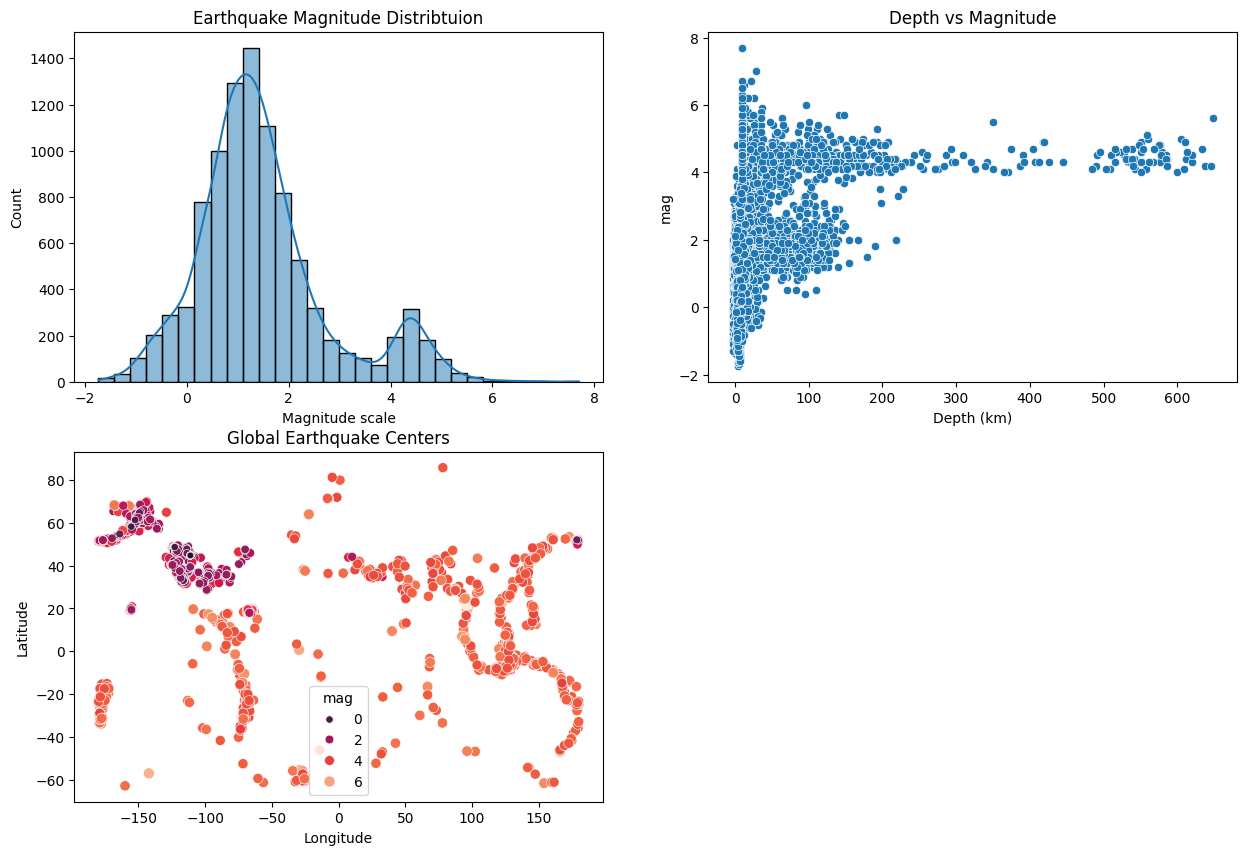

In [30]:
# some basic visuals for data analysis

plt.figure(figsize=(15, 10))

# first plot
plt.subplot(2,2,1)
plt.title('Earthquake Magnitude Distribtuion')
plt.xlabel('Magnitude scale')
sb.histplot(df['mag'], kde = True, bins = 30)
# Second plot
plt.subplot(2,2,2)
plt.title('Depth vs Magnitude')
plt.xlabel('Depth (km)')
sb.scatterplot(x = 'depth', y = 'mag', data = df)
# Globe locations
plt.subplot(2,2,3)
plt.title('Global Earthquake Centers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
sb.scatterplot(x = 'longitude', y = 'latitude', size = 'mag', data = df, hue = 'mag', palette = 'rocket')
plt.show()


In [31]:
# split in training and testing data

train_feat, test_feat, train_lab, test_lab = train_test_split(features,
                                                              target, test_size = 0.2,
                                                              random_state = 100)

In [32]:
regr_model = RandomForestRegressor()

In [33]:
trained_model = regr_model.fit(train_feat, train_lab)

/home/ubuntu/usgs-ml/lib/python3.12/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [36]:
predicted_mag = trained_model.predict(test_feat)

In [37]:
print(predicted_mag)

[0.9521 1.5372 0.0939 ... 1.585  1.244  0.8485]


In [39]:
mean_squared_error(test_lab, predicted_mag)

0.2391785034292883

In [40]:
mean_absolute_error(test_lab, predicted_mag)

0.35658410630007814

In [41]:
r2_score(test_lab, predicted_mag)

0.849311039197328